Descargar el excel de la pagina de CND

In [172]:
from selenium import webdriver
import time
ChromeDriver = webdriver.Chrome('webdriver//chromedriver.exe')
#Abrir la pagina web
ChromeDriver.get('https://www.cnd.com.pa/')
ChromeDriver.find_element("xpath" , value ='//*[@id="main-cta"]/div/div/div/div[3]/div/a').click()
ChromeDriver.find_element("xpath" , value = '//*[@id="page-content"]/div/div[2]/div[2]/div[2]/ul/li[1]/a').click()
time.sleep(3)
ChromeDriver.find_element("xpath" , value = '//*[@id="listado_informes"]/table/tbody/tr/td[text()="Posdespacho Diario"][1]/child::a[1]').click()
time.sleep(2)


C:\Users\alexj\AppData\Local\Temp/ipykernel_12012/2799344655.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  ChromeDriver = webdriver.Chrome('webdriver//chromedriver.exe')


Mover el archivo zip de la carpeta de descargas a una carpeta de preferencia

In [173]:
import os 
import shutil
#carpeta donde se descargan los archivos
DownloadFolder = r"C:\Users\alexj\Downloads\\"
#carpeta del proyecto
zipFolder = "D:\JupyterNotebook\Selenium_descargar\zipsexcel\\"


if __name__ == "__main__":    
    for filename in os.listdir(DownloadFolder):
        name, extension = os.path.splitext(DownloadFolder + filename)
        
        if extension in [".zip" , ".rar"]:
            zipFile = (DownloadFolder + filename)
            shutil.move(zipFile,zipFolder)
            print(name+": " + extension)  
    pass
        

C:\Users\alexj\Downloads\\PS180223: .zip


Extraer los archivos zip

In [174]:
import os 
import zipfile
#carpeta donde estan lso archivos
zipFolder = "D:\JupyterNotebook\Selenium_descargar\zipsexcel\\"

if __name__ == "__main__":    
    for filename in os.listdir(zipFolder):
        name, extension = os.path.splitext(zipFolder + filename)
        
        if extension in [".zip" , ".rar"]:
            zip = zipfile.ZipFile(zipFolder+filename,"r")
            os.mkdir(name)
            zip.extractall(pwd=None,path = name)
            print(name+" Se ha extraido correctamente " )
            zip.close()
        os.remove(name+".zip")  
        

D:\JupyterNotebook\Selenium_descargar\zipsexcel\PS180223 Se ha extraido correctamente 


Obtener fecha actual para tener el nombre del archivo de excel 

In [175]:
from datetime import datetime, timedelta

fecha_actual = datetime.now()
dia_semana = fecha_actual.weekday()
if dia_semana >= 5:
    dias_para_viernes = dia_semana - 4
    fecha_ajustada = fecha_actual - timedelta(days=dias_para_viernes)

fecha_formateada = fecha_actual.strftime('%d%m%y')
formato_excel= "PS"+fecha_formateada
print(formato_excel)

PS210223


Otra forma de tener el nombre solo con la ruta (esta es mucho mas especifica)

In [176]:
nombre_excel = os.path.basename(name) +".xls"
print(nombre_excel)

PS180223.xls


In [177]:
import pandas as pd

df = pd.read_excel(name+'\\' +nombre_excel,sheet_name="Potencias" ,skiprows=5)
df = df.rename(columns={'Unnamed: 1': '1','Unnamed: 3': '2','Unnamed: 5': '3','Unnamed: 7': '4','Unnamed: 9': '5','Unnamed: 11': '6','Unnamed: 13': '7','Unnamed: 15': '8','Unnamed: 17': '9','Unnamed: 19': '10','Unnamed: 21': '11','Unnamed: 23': '12','Unnamed: 25': '13','Unnamed: 27': '14','Unnamed: 29': '15','Unnamed: 31': '16','Unnamed: 33': '17','Unnamed: 35': '18','Unnamed: 37': '19','Unnamed: 39': '20','Unnamed: 41': '21','Unnamed: 43': '22','Unnamed: 45': '23','Unnamed: 47': '24',})

df1 = pd.read_excel(name+'\\' +nombre_excel,sheet_name="Precios" ,skiprows=5, header=0)
df1 = df1.rename(columns={'Unnamed: 1': '1','Unnamed: 3': '2','Unnamed: 5': '3','Unnamed: 7': '4','Unnamed: 9': '5','Unnamed: 11': '6','Unnamed: 13': '7','Unnamed: 15': '8','Unnamed: 17': '9','Unnamed: 19': '10','Unnamed: 21': '11','Unnamed: 23': '12','Unnamed: 25': '13','Unnamed: 27': '14','Unnamed: 29': '15','Unnamed: 31': '16','Unnamed: 33': '17','Unnamed: 35': '18','Unnamed: 37': '19','Unnamed: 39': '20','Unnamed: 41': '21','Unnamed: 43': '22','Unnamed: 45': '23','Unnamed: 47': '24',})

df = df.loc[:, ~ (df == 0).all()]
df = df.dropna(axis=1)
df1 = df1.loc[:, ~ (df1 == 0).all()]
df1 = df1.dropna(axis=1,how='all')

df1.head(10)

,UNIDADES,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,MIRAFLORES G5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TERMOCOLON G2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TERMOCOLON G1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tropitermica G1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tropitermica G2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Tropitermica G3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TCO CICLO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,J. BROWN G6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BLM G8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,COSTA NORTE G1D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
df1 = df1[~(df1 == 0).any(axis=1)]
df1 = df1.drop(222)

df1.head(10)

,UNIDADES,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
46,FORTUNA G1,103.150000,103.150000,103.150000,103.150000,103.150000,103.150000,103.15000,103.150000,103.150000,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
47,FORTUNA G2,103.150000,103.150000,103.150000,103.150000,103.150000,103.150000,103.15000,103.150000,103.150000,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
48,FORTUNA G3,103.150000,103.150000,103.150000,103.150000,103.150000,103.150000,103.15000,103.150000,103.150000,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
87,MIRAFLORES G10,95.538000,95.519000,95.537000,95.534000,95.537000,95.523000,95.53700,96.580000,103.104000,...,103.215000,102.950000,103.00300,97.956000,95.523000,95.52300,95.52600,95.521000,95.514000,95.531000
95,CNO CICLO,85.082123,85.860999,83.083975,83.125744,83.122845,83.131804,83.14706,83.150325,83.134476,...,82.938808,82.978304,83.01167,83.037687,83.030724,83.08599,83.11178,83.122471,83.127979,83.100865
96,COBRE PANAMA 1,48.446300,48.446300,48.446300,48.446300,48.446300,48.446300,48.44630,48.446300,48.446300,...,48.446300,48.446300,48.44630,48.446300,48.446300,48.44630,48.44630,48.446300,48.446300,48.446300
97,COBRE PANAMA 2,48.446300,48.446300,48.446300,48.446300,48.446300,48.446300,48.44630,48.446300,48.446300,...,48.446300,48.446300,48.44630,48.446300,48.446300,48.44630,48.44630,48.446300,48.446300,48.446300


In [179]:
df = df[~(df == 0).any(axis=1)]
df.head(10)

,UNIDADES,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
46,FORTUNA G1,72.5965,41.8341,37.0299,30.7727,31.8278,52.0491,46.4170,30.8921,18.7082,...,23.6922,34.6449,52.1930,77.6708,65.6334,84.1649,69.2339,51.8138,27.1475,17.9440
47,FORTUNA G2,72.7903,41.7180,37.0665,30.8487,31.9837,51.9901,46.4509,30.9028,18.7524,...,23.8510,35.0404,52.1644,77.5632,65.7373,83.9812,69.1629,51.8648,27.1523,18.0684
48,FORTUNA G3,72.6215,41.7953,37.2055,30.7107,32.0450,51.9750,46.3784,30.7671,18.5731,...,23.9081,34.8962,52.2382,77.4702,65.7375,84.1585,69.1875,51.7453,27.0215,17.8760
87,MIRAFLORES G10,37.8100,38.3300,37.8175,37.9100,37.8200,38.2100,37.8175,30.2750,19.3700,...,19.2725,19.5075,19.4600,26.3325,38.2100,38.1950,38.1000,38.2625,38.4800,37.9800
95,CNO CICLO,295.6330,278.8317,360.3643,361.4836,361.4059,361.6460,362.0548,362.1423,361.7176,...,356.4742,357.5326,358.4267,359.1239,358.9373,360.4183,361.1094,361.3959,361.5435,360.8169
98,ACP1,12.6300,13.3800,13.6100,13.3200,13.2800,13.3900,12.8600,14.1000,13.9700,...,12.8400,12.9600,12.8800,12.3600,11.3200,11.7500,11.9000,11.8700,12.5700,13.1200
103,ALGARROBO G1,3.0525,3.0825,3.0125,2.9850,3.0275,3.0825,2.8625,2.8775,2.8375,...,2.6875,2.4375,2.3275,2.1475,2.1000,2.0475,2.0150,2.0175,1.9900,1.9825
110,BAJO DE MINA G3,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,...,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400,0.4400
113,BARRO BLANCO G2,6.0475,6.0625,6.0025,6.0600,5.9875,6.0325,6.0625,6.0675,6.0450,...,6.0625,6.0325,6.0325,6.0475,5.9875,6.0225,6.0525,6.0325,6.0500,6.0700
114,BARRO BLANCO G3,1.6000,1.6000,1.6075,1.6075,1.6100,1.6100,1.6100,1.6100,1.6100,...,1.6100,1.6150,1.6100,1.6100,1.6100,1.6100,1.6100,1.6100,1.6100,1.6100


Text(0.5, 1.0, 'Precio por hora')

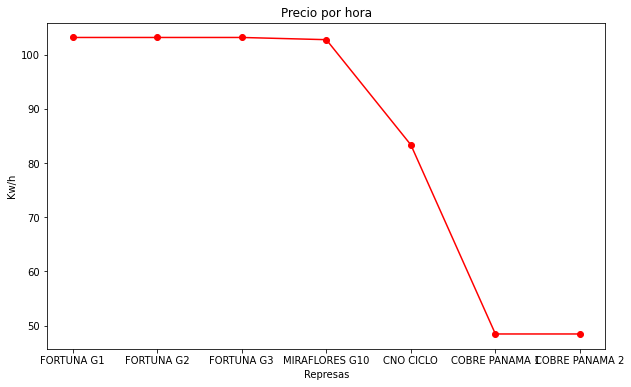

In [180]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1['UNIDADES'], df1['12'], color = 'red', marker = 'o')
ax.set_xlabel('Represas')
ax.set_ylabel('Kw/h')
ax.set_title('Precio por hora')

In [181]:
resultado = pd.merge(df, df1, how='inner', on='UNIDADES')
resultado.head(10)

,UNIDADES,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,15_y,16_y,17_y,18_y,19_y,20_y,21_y,22_y,23_y,24_y
0,FORTUNA G1,72.5965,41.8341,37.0299,30.7727,31.8278,52.0491,46.4170,30.8921,18.7082,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
1,FORTUNA G2,72.7903,41.7180,37.0665,30.8487,31.9837,51.9901,46.4509,30.9028,18.7524,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
2,FORTUNA G3,72.6215,41.7953,37.2055,30.7107,32.0450,51.9750,46.3784,30.7671,18.5731,...,103.150000,103.150000,103.15000,103.150000,103.150000,103.15000,103.15000,103.150000,103.150000,103.150000
3,MIRAFLORES G10,37.8100,38.3300,37.8175,37.9100,37.8200,38.2100,37.8175,30.2750,19.3700,...,103.215000,102.950000,103.00300,97.956000,95.523000,95.52300,95.52600,95.521000,95.514000,95.531000
4,CNO CICLO,295.6330,278.8317,360.3643,361.4836,361.4059,361.6460,362.0548,362.1423,361.7176,...,82.938808,82.978304,83.01167,83.037687,83.030724,83.08599,83.11178,83.122471,83.127979,83.100865


se grafica los resultados de los precios de las horas de cada represa con datos completos

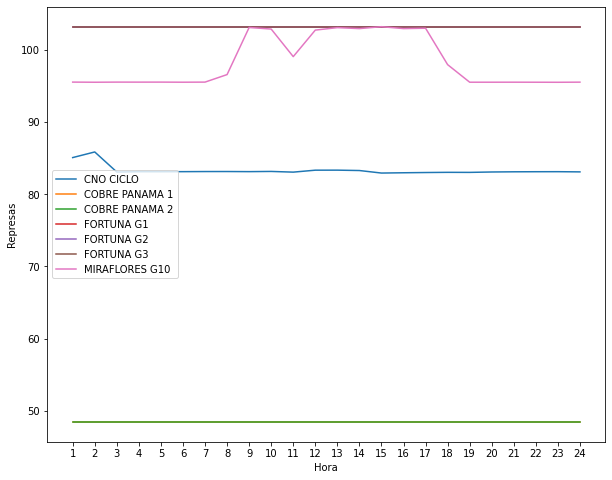

In [182]:
grouped = df1.groupby('UNIDADES')
plt.figure(figsize=(10,8))  # especificar tamaño de la figura

# Iterar sobre cada grupo y graficar
for name, group in grouped:
    # Eliminar la columna 'Unidades' del grupo y convertir las horas a filas
    df_group = group.drop('UNIDADES', axis=1).transpose()
    
    # Graficar las filas del grupo
    plt.plot(df_group.index, df_group.values, label=name)

# Configurar la leyenda y las etiquetas de los ejes

plt.legend()
plt.xlabel('Hora')
plt.ylabel('Represas')

plt.show()

In [183]:
import subprocess

df1.to_csv('D:\JupyterNotebook\Selenium_descargar\csv\dataframe.csv',index = True)


power_bi_ruta = "D:\PowerBI\\bin\PBIDesktop.exe"

command = f'"{power_bi_ruta}" /file "D:\JupyterNotebook\Selenium_descargar\csv\dataframe.csv"'

subprocess.call(command)


0